In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/daily_data.csv
/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv('/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/daily_data.csv')
dataset

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,D2889,C112,17.1,Clear and Sunny,13.3,61,1017.0,0.0,57,3,17.1,10.0,1.0,22.2,1,05:49 AM,05:51 PM
2889,D2890,C112,17.4,NaN,13.0,51,1017.0,0.0,49,0,17.4,10.0,1.0,22.2,1,05:49 AM,05:52 PM
2890,D2891,C112,19.2,NaN,11.5,46,1016.0,0.0,34,0,19.2,10.0,1.0,21.3,2,05:48 AM,05:52 PM
2891,D2892,C112,19.2,NaN,14.4,76,1017.0,0.0,45,2,19.2,10.0,1.0,24.9,2,05:47 AM,05:52 PM


In [4]:
df = dataset.set_index(['day_id'])
df.tail()

,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
day_id,,,,,,,,,,,,,,,,
D2889,C112,17.1,Clear and Sunny,13.3,61,1017.0,0.0,57,3,17.1,10.0,1.0,22.2,1,05:49 AM,05:51 PM
D2890,C112,17.4,NaN,13.0,51,1017.0,0.0,49,0,17.4,10.0,1.0,22.2,1,05:49 AM,05:52 PM
D2891,C112,19.2,NaN,11.5,46,1016.0,0.0,34,0,19.2,10.0,1.0,21.3,2,05:48 AM,05:52 PM
D2892,C112,19.2,NaN,14.4,76,1017.0,0.0,45,2,19.2,10.0,1.0,24.9,2,05:47 AM,05:52 PM
D2893,C112,18.6,NaN,17.3,61,1016.0,0.0,34,0,18.6,10.0,1.0,30.2,2,05:46 AM,05:52 PM


In [5]:
# Drop unnecessary columns
df1 = df.drop(['city_id', 'sunrise', 'sunset'], axis=1)
df1

,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index
day_id,,,,,,,,,,,,,
D0001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2
D0002,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1
D0003,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1
D0004,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1
D0005,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
D2889,17.1,Clear and Sunny,13.3,61,1017.0,0.0,57,3,17.1,10.0,1.0,22.2,1
D2890,17.4,NaN,13.0,51,1017.0,0.0,49,0,17.4,10.0,1.0,22.2,1
D2891,19.2,NaN,11.5,46,1016.0,0.0,34,0,19.2,10.0,1.0,21.3,2


In [6]:
df1.isnull().sum()

temperature_celsius            0
condition_text              2414
wind_kph                       0
wind_degree                    0
pressure_mb                    0
precip_mm                      0
humidity                       0
cloud                          0
feels_like_celsius             0
visibility_km                  0
uv_index                       0
gust_kph                       0
air_quality_us-epa-index       0
dtype: int64

In [7]:
df2 = df1[df1['condition_text'].notnull()]
df2

,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index
day_id,,,,,,,,,,,,,
D0003,20.0,Light Rain with Thunder,3.6,10,1011.0,4.50,100,75,20.0,10.0,1.0,12.6,1
D0004,17.0,Clear and Sunny,6.1,150,1018.0,0.00,88,0,17.0,10.0,1.0,11.2,1
D0007,21.0,Partly Cloudy,4.0,310,1015.0,0.00,100,50,21.0,10.0,1.0,15.1,2
D0019,19.0,Clear and Sunny,3.6,64,1017.0,0.00,88,0,19.0,10.0,1.0,8.3,3
D0028,19.0,Partly Cloudy,3.6,83,1010.0,0.00,73,25,19.0,10.0,1.0,8.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
D2839,27.0,Partly Cloudy,19.1,90,1014.0,0.01,70,25,29.8,10.0,6.0,45.6,1
D2864,21.4,Light Precipitation,3.6,178,1012.0,0.00,89,75,21.4,10.0,6.0,6.6,1
D2874,16.9,Clear and Sunny,16.6,68,1018.0,0.00,44,2,16.9,10.0,1.0,27.0,1


In [8]:
df2.isnull().sum()

temperature_celsius         0
condition_text              0
wind_kph                    0
wind_degree                 0
pressure_mb                 0
precip_mm                   0
humidity                    0
cloud                       0
feels_like_celsius          0
visibility_km               0
uv_index                    0
gust_kph                    0
air_quality_us-epa-index    0
dtype: int64

In [9]:
df2.shape

(479, 13)

<Axes: ylabel='count'>

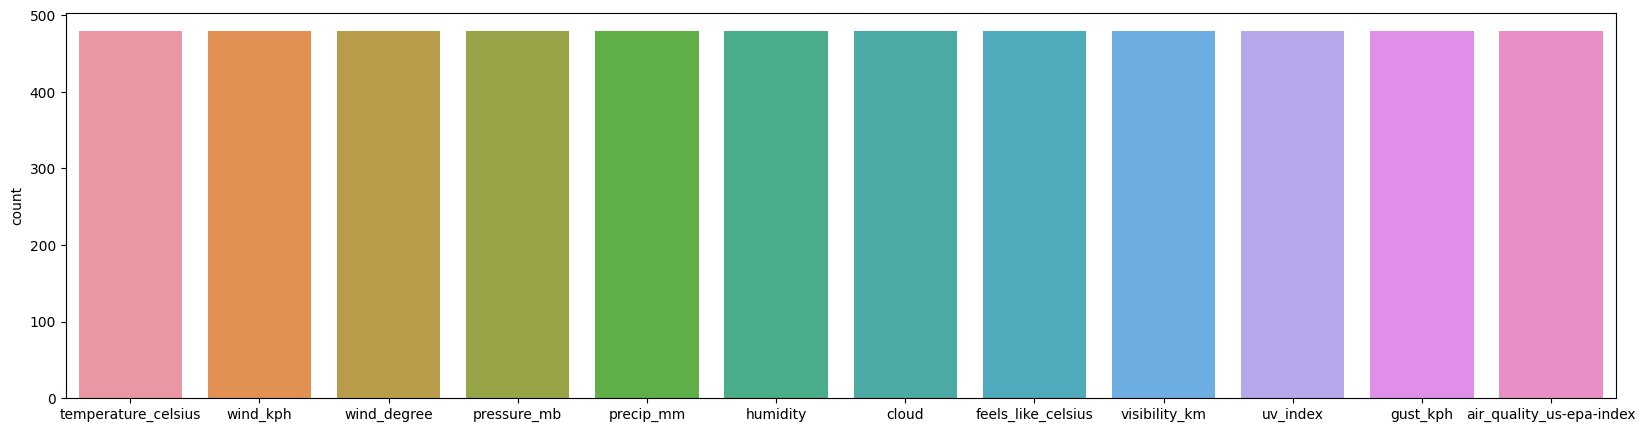

In [10]:
plt.figure(figsize=(20,5))
# Font size for labels
label_fontsize = 6
sns.countplot(data=df2)

In [11]:
df2.condition_text.unique()

array(['Light Rain with Thunder', 'Clear and Sunny', 'Partly Cloudy',
       'Light Precipitation', 'Cloudy and Overcast', 'Mist or Fog',
       'Rain Showers', 'Moderate to Heavy Rain', 'Thunderstorms'],
      dtype=object)

In [12]:
df2['condition_text'].value_counts()

condition_text
Clear and Sunny            122
Partly Cloudy              122
Light Precipitation         68
Cloudy and Overcast         53
Mist or Fog                 50
Rain Showers                21
Light Rain with Thunder     16
Thunderstorms               15
Moderate to Heavy Rain      12
Name: count, dtype: int64

In [13]:
df2.groupby('condition_text').count()

,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index
condition_text,,,,,,,,,,,,
Clear and Sunny,122,122,122,122,122,122,122,122,122,122,122,122
Cloudy and Overcast,53,53,53,53,53,53,53,53,53,53,53,53
Light Precipitation,68,68,68,68,68,68,68,68,68,68,68,68
Light Rain with Thunder,16,16,16,16,16,16,16,16,16,16,16,16
Mist or Fog,50,50,50,50,50,50,50,50,50,50,50,50
Moderate to Heavy Rain,12,12,12,12,12,12,12,12,12,12,12,12
Partly Cloudy,122,122,122,122,122,122,122,122,122,122,122,122
Rain Showers,21,21,21,21,21,21,21,21,21,21,21,21
Thunderstorms,15,15,15,15,15,15,15,15,15,15,15,15


In [14]:
X=df2[['temperature_celsius','wind_kph','wind_degree','pressure_mb','precip_mm','humidity','cloud','feels_like_celsius','visibility_km','uv_index','gust_kph','air_quality_us-epa-index']].values

In [15]:
print(X)

[[ 20.    3.6  10.  ...   1.   12.6   1. ]
 [ 17.    6.1 150.  ...   1.   11.2   1. ]
 [ 21.    4.  310.  ...   1.   15.1   2. ]
 ...
 [ 16.9  16.6  68.  ...   1.   27.    1. ]
 [ 19.5   5.4  27.  ...   1.   11.2   2. ]
 [ 17.1  13.3  61.  ...   1.   22.2   1. ]]


In [16]:
X.shape

(479, 12)

In [17]:
y1=df2['condition_text'].values

In [18]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [19]:
# Initialize and fit LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y1)

In [20]:
Y

array([3, 0, 6, 0, 6, 6, 3, 2, 1, 1, 6, 1, 0, 1, 0, 0, 6, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 4, 0, 1, 2, 7, 6, 2, 1, 7, 6, 1, 3, 2, 5, 2, 2, 0,
       4, 0, 1, 4, 0, 0, 2, 0, 0, 0, 8, 2, 2, 2, 2, 6, 2, 6, 2, 0, 2, 6,
       6, 6, 6, 2, 8, 3, 2, 6, 6, 3, 1, 6, 4, 5, 1, 0, 4, 4, 4, 4, 0, 2,
       6, 0, 0, 0, 4, 1, 1, 0, 0, 0, 0, 0, 0, 4, 4, 4, 7, 7, 6, 6, 1, 8,
       6, 3, 6, 6, 6, 7, 6, 1, 3, 4, 6, 4, 6, 0, 4, 5, 6, 6, 6, 8, 4, 4,
       4, 7, 6, 6, 1, 6, 0, 0, 0, 0, 4, 0, 0, 6, 1, 6, 6, 6, 6, 6, 8, 6,
       1, 0, 2, 6, 1, 2, 0, 0, 0, 0, 0, 0, 1, 6, 0, 3, 2, 7, 6, 6, 2, 4,
       6, 6, 6, 7, 7, 6, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 6, 0, 0, 2, 6, 2, 2, 2, 5, 6, 0, 0, 0, 2, 7, 6, 1, 7, 6,
       2, 6, 6, 2, 2, 7, 2, 6, 7, 2, 2, 0, 2, 2, 2, 2, 0, 4, 0, 4, 4, 2,
       1, 6, 0, 0, 1, 6, 0, 1, 4, 6, 0, 2, 0, 6, 6, 6, 6, 6, 8, 8, 0, 8,
       6, 0, 5, 6, 1, 2, 7, 6, 6, 1, 1, 1, 1, 1, 6, 6, 1, 6, 1, 6, 1, 0,
       0, 0, 6, 0, 7, 7, 6, 6, 0, 5, 0, 6, 6, 0, 0,

In [21]:
Y.shape

(479,)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [24]:
X_train.shape

(359, 12)

In [25]:
X_test

array([[ 16. ,  28.1, 160. , ...,   1. ,  33.3,   1. ],
       [ 14. ,  15.1, 250. , ...,   1. ,   4.7,   1. ],
       [ 24. ,  11.2,  60. , ...,   1. ,  10.8,   2. ],
       ...,
       [ 16. ,  33.1, 320. , ...,   1. ,  16.2,   1. ],
       [ 18. ,  11.2,  50. , ...,   1. ,  14.8,   1. ],
       [ 18. ,   3.6, 295. , ...,   1. ,   6.9,   1. ]])

In [26]:
X_test.shape

(120, 12)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

2024-06-23 15:04:18.326711: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 15:04:18.326879: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 15:04:18.504389: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [28]:
N_features=X_train.shape[1]
print(N_features)

12


In [29]:
# Define the model
model = Sequential()
model.add(Dense(200, input_dim=12, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(Dense(9, activation='softmax'))

In [30]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [31]:
model.fit(X_train,Y_train,epochs=64)

Epoch 1/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 27.6185 - sparse_categorical_accuracy: 0.1822
Epoch 2/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.4372 - sparse_categorical_accuracy: 0.1869  
Epoch 3/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7544 - sparse_categorical_accuracy: 0.2118 
Epoch 4/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4747 - sparse_categorical_accuracy: 0.2009
Epoch 5/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2413 - sparse_categorical_accuracy: 0.2349 
Epoch 6/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0492 - sparse_categorical_accuracy: 0.2244 
Epoch 7/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0602 - sparse_categorical_accuracy: 0.2458 
Epoch 8/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0804 - sparse_categorical_accuracy: 0.2202 
Epoch 9/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9519 - sparse_categorical_accuracy: 0.2912 
Epoch 10/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.970

In [32]:
prediction= model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [33]:
Y_pred = np.argmax(prediction, axis=1)

In [34]:
Y_pred

array([0, 6, 0, 6, 6, 6, 0, 6, 6, 0, 6, 6, 6, 0, 6, 6, 0, 0, 6, 0, 6, 0,
       0, 6, 6, 6, 6, 6, 0, 6, 6, 0, 0, 6, 0, 6, 6, 0, 6, 6, 0, 6, 6, 0,
       6, 0, 6, 6, 6, 6, 6, 0, 6, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 0, 6, 6,
       0, 6, 0, 0, 0, 6, 6, 0, 6, 0, 6, 6, 0, 6, 0, 0, 6, 6, 0, 0, 0, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 0, 6, 0, 0, 6, 6, 0, 0, 0, 0, 6, 6,
       0, 6, 6, 6, 6, 0, 0, 0, 6, 6])

In [35]:
Y_test_class= np.argmax(prediction, axis=1)

In [36]:
Y_test_class

array([0, 6, 0, 6, 6, 6, 0, 6, 6, 0, 6, 6, 6, 0, 6, 6, 0, 0, 6, 0, 6, 0,
       0, 6, 6, 6, 6, 6, 0, 6, 6, 0, 0, 6, 0, 6, 6, 0, 6, 6, 0, 6, 6, 0,
       6, 0, 6, 6, 6, 6, 6, 0, 6, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 0, 6, 6,
       0, 6, 0, 0, 0, 6, 6, 0, 6, 0, 6, 6, 0, 6, 0, 0, 6, 6, 0, 0, 0, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 0, 6, 0, 0, 6, 6, 0, 0, 0, 0, 6, 6,
       0, 6, 6, 6, 6, 0, 0, 0, 6, 6])

In [37]:
import tensorflow as tf

In [38]:
tf.keras.metrics.binary_accuracy(Y_test_class,Y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.41666666>

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test_class,Y_pred))
print(confusion_matrix(Y_test_class,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        70

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[50  0]
 [ 0 70]]


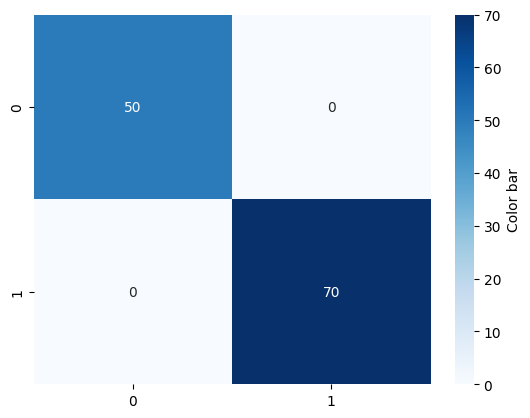

In [40]:
sns.heatmap(confusion_matrix(Y_test_class,Y_pred),annot=True,cmap='Blues',cbar_kws={"label":"Color bar"})
plt.show()

In [41]:
df3=df1[['temperature_celsius','wind_kph','wind_degree','pressure_mb','precip_mm','humidity','cloud','feels_like_celsius','visibility_km','uv_index','gust_kph','air_quality_us-epa-index']]
df3

,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index
day_id,,,,,,,,,,,,
D0001,27.0,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2
D0002,22.0,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1
D0003,20.0,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1
D0004,17.0,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1
D0005,18.0,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
D2889,17.1,13.3,61,1017.0,0.0,57,3,17.1,10.0,1.0,22.2,1
D2890,17.4,13.0,51,1017.0,0.0,49,0,17.4,10.0,1.0,22.2,1
D2891,19.2,11.5,46,1016.0,0.0,34,0,19.2,10.0,1.0,21.3,2


In [42]:
df3.isnull().sum()

temperature_celsius         0
wind_kph                    0
wind_degree                 0
pressure_mb                 0
precip_mm                   0
humidity                    0
cloud                       0
feels_like_celsius          0
visibility_km               0
uv_index                    0
gust_kph                    0
air_quality_us-epa-index    0
dtype: int64

In [43]:
df4=df3.values

In [44]:
type(df4)

numpy.ndarray

In [45]:
# Make predictions for the entire dataset
Y_pred_full = model.predict(df4)
Y_pred_classes = np.argmax(Y_pred_full, axis=1)

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [46]:
Y_pred_labels = label_encoder.inverse_transform(Y_pred_classes)

In [47]:
print(Y_pred_labels)

['Partly Cloudy' 'Partly Cloudy' 'Partly Cloudy' ... 'Clear and Sunny'
 'Clear and Sunny' 'Clear and Sunny']


In [48]:
np.unique(Y_pred_labels)

array(['Clear and Sunny', 'Partly Cloudy'], dtype=object)

In [49]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'day_id': df3.index,
    'condition_text': Y_pred_labels
})

# Save the predictions to a CSV file
submission.to_csv('submission.csv', index=False)